# Geneva House Renting Consultancy
Capstone Project, Applied Data Science Capstone by IBM/Coursera, Simone Lisi

## Clustering properties in Geneva.

In this notebook, we will cluster properties available for rent in Geneva, according to their nearby veanues.

We will do so using the k-means  method with k=3.

We will finally produce boxplot to be later discussed in the main report

# /////////////////// //////////////////// ////////////////////
# Installing packages
Set this cell to 'code' if needed.

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab


# /////////////////// //////////////////// ////////////////////


In [129]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
import folium # map rendering library
import seaborn as sns

print('Libraries imported.')

Libraries imported.


In [130]:
## loading dataframe prevoiusely created in Geneva_properties_FA.ipynb
df = pd.read_csv("geneva_allapp.csv")
df.set_index(df.columns[0], inplace = True)
df.index.name = None
df.head()

,cityName,extraPrice,price,latitude,longitude,numberOfRooms,street,surfaceLiving,zip,pricePerRoom,pricePerSqm,price_dev,Food,Shop & Service,Travel & Transport,Outdoors & Recreation,Arts & Entertainment,Nightlife Spot,Professional & Other Places,Residence
6065071,Genève,350.0,2550,46.19363,6.16698,4.0,Rue Le Corbusier 18,85,1208,637.500000,30.000000,-0.171515,7,3,3,0,0,0,0,0
6046525,Genève,200.0,4200,46.19646,6.16090,5.5,Route de Malagnou 40E,110,1208,763.636364,38.181818,0.105094,22,7,3,2,1,1,0,0
6063101,Genève,170.0,2810,46.20429,6.15891,4.0,Rue du 31-Décembre 16,60,1207,702.500000,46.833333,0.211344,29,3,1,2,1,6,0,0
6054808,Genève,250.0,4750,46.19523,6.15391,7.0,Rue Marignac,165,1206,678.571429,28.787879,-0.148491,21,3,3,1,2,1,0,0
6037279,Le Lignon,200.0,2700,46.20313,6.09613,6.0,Avenue du Lignon,107,1219,450.000000,25.233645,-0.357799,3,1,0,1,0,0,0,0


In [131]:
### Geneva coordinates, for creating maps
address = 'Geneva, switzerland'

geolocator = Nominatim(user_agent= "To_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Geneva are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Geneva are 46.2017559, 6.1466014.


In [132]:
#### Geneva key spots coordinates, for creating maps
key_sites_dic = {
    'cornavin' : [46.2106, 6.1425310072],
    'carouge' : [46.18733, 6.13750521],    
    'eauxvives' : [46.202, 6.160],
    'plainpalais' : [46.199, 6.142],
    'champel' : [46.1931, 6.158]
}

# and a dictionary to color code them in a map
key_sites_dic_col = {
    'cornavin' : 'red',
    'carouge' : 'green',    
    'eauxvives' : 'purple',
    'plainpalais' : 'yellow',
    'champel' : 'brown'
}


In [166]:
## Properties Clustering

# set number of clusters
kclusters = 3

keep_list = [ 'Food',
             'Outdoors & Recreation', 'Arts & Entertainment', 
             'Nightlife Spot', 'Shop & Service',
            'Travel & Transport','Professional & Other Places']

df_reduced = df[keep_list]

df_reduced.head()

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_reduced)

# check cluster labels generated for each row in the dataframe
print(list(kmeans.labels_).count(0))
print(list(kmeans.labels_).count(1))
print(list(kmeans.labels_).count(2))




132
291
86


In [170]:
map_geneva = folium.Map(location=[latitude, longitude], zoom_start=13)
colors = [ 'green','blue', 'orange']
# add markers to map



for lat, lng, price, k_label in zip(df['latitude'], df['longitude'], df['price'], kmeans.labels_):
    label = '{:.0f}, {:.0f}'.format(price, k_label)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=colors[k_label],
        fill=True,
        fill_opacity=0.7,
        parse_html=False).add_to(map_geneva)  

    
for key in key_sites_dic:
    label = '{}'.format(key.title() )
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [key_sites_dic[key][0], key_sites_dic[key][1]],
        radius=10,
        popup=label,
        color=key_sites_dic_col[key],
        fill=True,
        fill_opacity=0.7,
        parse_html=False).add_to(map_geneva)  
        
        
loc = 'Clustered Properties'
title_html = '''
             <h3 align="left" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   
map_geneva.get_root().html.add_child(folium.Element(title_html))
    
map_geneva
    

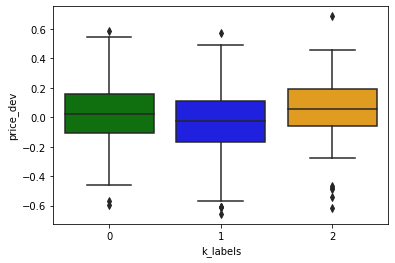

In [171]:
## Generating boxplots for discussion in the maintext
df["k_labels"]= kmeans.labels_
pal = {0: "green", 1: "blue", 2:"orange"}
sns.boxplot(x="k_labels", y="price_dev", data=df, palette=pal)

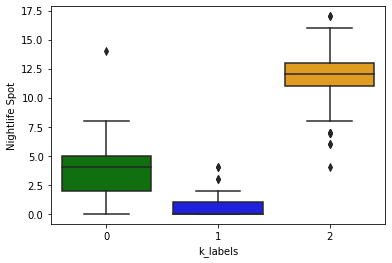

In [172]:
## Generating boxplots for discussion in the maintext
sns.boxplot(x="k_labels", y="Nightlife Spot", data=df, palette=pal)

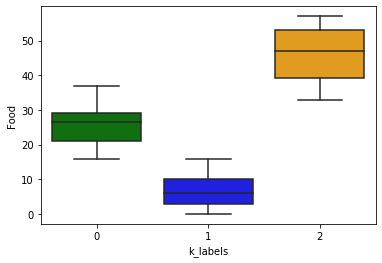

In [173]:
## Generating boxplots for discussion in the maintext
sns.boxplot(x="k_labels", y="Food", data=df, palette=pal)

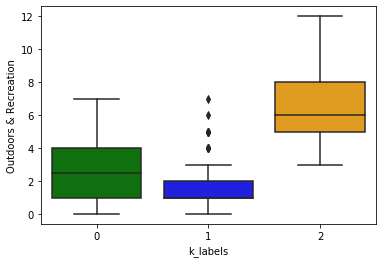

In [174]:
## Generating boxplots for discussion in the maintext
sns.boxplot(x="k_labels", y="Outdoors & Recreation", data=df, palette=pal)

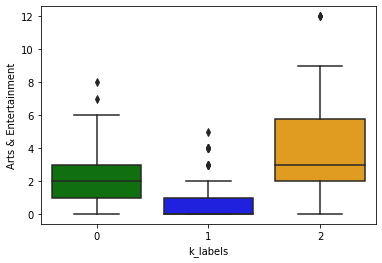

In [175]:
## Generating boxplots for discussion in the maintext
sns.boxplot(x="k_labels", y='Arts & Entertainment', data=df, palette=pal)

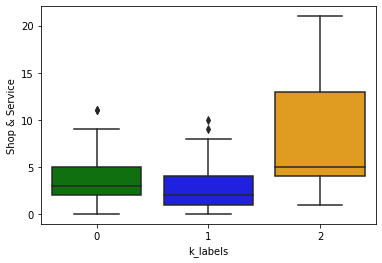

In [176]:
## Generating boxplots for discussion in the maintext
sns.boxplot(x="k_labels", y='Shop & Service', data=df, palette=pal)

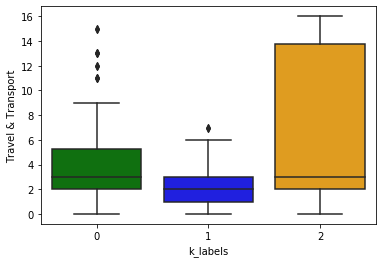

In [177]:
## Generating boxplots for discussion in the maintext
sns.boxplot(x="k_labels", y='Travel & Transport', data=df, palette=pal)

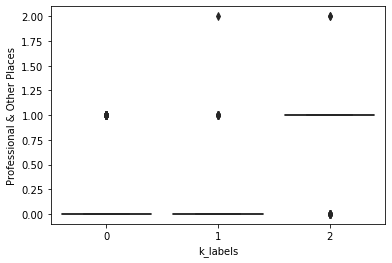

In [178]:
## Generating boxplots for discussion in the maintext
sns.boxplot(x="k_labels", y='Professional & Other Places', data=df, palette=pal)
